Octavio Morales:
I pledge my honor that I have abided by the Stevens Honor System.

Before this code gets looked through, you mentioned to cite any sources used. Although there isn't plagiarism, there are a LOT of tutorials online that helped me have a better understanding of this assignment, like the modules used. There are countless sources that I could mention, but some notable ones are geeksforgeeks.org, Corey Schafer (Youtube), freeCodeCamp.org (Youtube), Simplilearn (Youtube), and Intellipaat (Youtube)

Question 1

Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


Part a) [25 pts] Perform pre-processing and EDA on the data and split it into training and testing datasets. Have a split ratio of 75% and 25% for the training and testing datasets, respectively. Please explain the performance. Students can make visualizations if necessary.


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                           

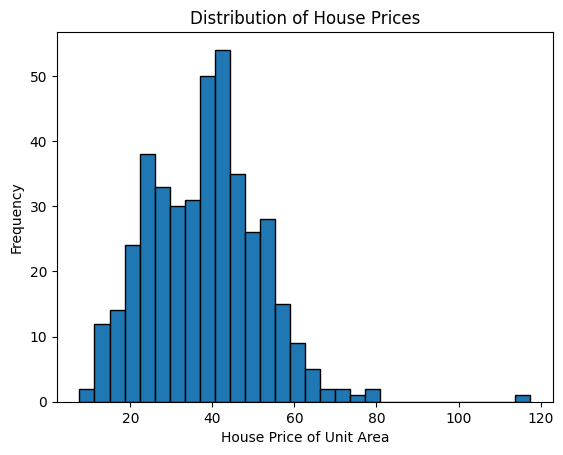

In [6]:
def load_and_preprocess_data(filepath):
    data = pd.read_csv(filepath)
    print(data.isnull().sum())
    print()
    print(data.describe())
    print()
    return data

def visualize_data(data):
    plt.hist(data['Y house price of unit area'], bins=30, edgecolor='black')
    plt.title('Distribution of House Prices')
    plt.xlabel('House Price of Unit Area')
    plt.ylabel('Frequency')
    plt.show()

filepath = 'Real estate.csv'  # Adjust the filepath to your dataset
data = load_and_preprocess_data(filepath)
visualize_data(data)


Splitting the data into training and testing sets

In [7]:
def split_data(data):
    X = data.drop(['No', 'Y house price of unit area'], axis=1)
    y = data['Y house price of unit area']
    return train_test_split(X, y, test_size=0.25)

xT, testX, yT, testY = split_data(data)


In [8]:
def helpME(xT, testX):
    scaler = StandardScaler()
    xtScaled = scaler.fit_transform(xT)
    testXScaled = scaler.transform(testX)
    return xtScaled, testXScaled

xtScaled, testXScaled = helpME(xT, testX)

Part b) [35 pts] Define a function linear regression model that takes the learning rate = 0.05 and iteration = 1000. This model will perform SGD. You can initialize random weights using NumPy. Report the mean squared error (MSE). This model is going to return the learned weights. 

SGD Linear Regression Function

In [9]:
def sgd_linear_regression(X, y, learning_rate=0.05, iterations=1000, max_grad=1.0):
    m, n = X.shape
    xB = np.c_[np.ones((m, 1)), X] 
    weights = np.random.randn(n + 1, 1) * 0.01
    
    for iteration in range(iterations):
        shuffled = np.random.permutation(m)
        X_b_shuffled = xB[shuffled]
        y_shuffled = y[shuffled]
        for spot in range(m):
            ySpot = y_shuffled[spot:spot+1]
            xSpot = X_b_shuffled[spot:spot+1]
            grad = 2 * xSpot.T.dot(xSpot.dot(weights) - ySpot)
            grad = np.clip(grad, -max_grad, max_grad)
            weights = weights - learning_rate * grad
    return weights

weights = sgd_linear_regression(xtScaled, yT.values.reshape(-1, 1))

Getting Mean Squared Error (MSE)

In [10]:
def train_and_evaluate(xtScaled, yT, testXScaled, testY, learning_rate=0.001):
    yTChange = yT.values.reshape(-1, 1)
    weights = sgd_linear_regression(xtScaled, yTChange, learning_rate)
    y_pred = np.dot(np.c_[np.ones((testXScaled.shape[0], 1)), testXScaled], weights)
    mse = np.mean((testY.values.reshape(-1, 1) - y_pred) ** 2)
    print(f'MSE: {mse}')
    print()
    return weights, mse

train_and_evaluate(xtScaled, yT, testXScaled, testY)

MSE: 63.832322178744235



(array([[36.59292665],
        [ 0.63752743],
        [-3.6968824 ],
        [-7.92480643],
        [ 2.8146998 ],
        [ 3.92331306],
        [-0.17413796]]),
 63.832322178744235)

Part c) [15 pts] Use different learning rate values to retrain the model. 
a.	Learning rates = [5E-3, 1E-2, 1E-1, 5E-1]
b.	Report the MSE value for each learning rate.


In [11]:
def experiment_with_learning_rates(xT, yT, testX, testY):
    learning_rates = [0.005, 0.01, 0.1, 0.5]
    for lr in learning_rates:
        weights = sgd_linear_regression(xT, yT.values.reshape(-1, 1), learning_rate=lr)
        y_pred = np.dot(np.c_[np.ones((testX.shape[0], 1)), testX], weights)
        mse = np.mean((testY.values.reshape(-1, 1) - y_pred) ** 2)
        print(f'Learning rate: {lr}, MSE: {mse}')
experiment_with_learning_rates(xT, yT, testX, testY)


Learning rate: 0.005, MSE: 972.8132879945772
Learning rate: 0.01, MSE: 1464.0885092830313
Learning rate: 0.1, MSE: 27373.82506100719
Learning rate: 0.5, MSE: 1825.8473869308498


Part d) [5 pts] Using the final model obtained from c), generalize the model using the test set. Report the mean squared error value. 

In [12]:
bestRate = 0.001 
newWeights, newMSE = train_and_evaluate(xtScaled, yT, testXScaled, testY, bestRate)

MSE: 63.82178329175148



Question 2: Scikit-learn linear regression. [20 pts]
In this question, students will use the Scikit-learn linear regression model to predict the real estate cost and compare the results in Question 1.
a)	[10 pts] Now import linear regression from Scikit-learn and train the model.
b)	[5 pts] Get the prediction on the test set.
c)	[5 pts] Compare the result of your model to that of the Scikit-learn model.


In [13]:
def compare_with_sklearn(xT, yT, testX, testY):
    '''Question 2 part a'''
    lr_model = LinearRegression() 
    lr_model.fit(xT, yT)

    '''Question 2 part b'''
    y_pred_sklearn = lr_model.predict(testX)
    mse_sklearn = mean_squared_error(testY, y_pred_sklearn)

    '''Question 2 part c'''
    print(f"Custom SGD Model MSE: {newMSE}")
    print()
    print(f"Scikit-learn Model MSE: {mse_sklearn}")
    print()
    
    if newMSE < mse_sklearn:
        print("The custom SGD model outperforms the Scikit-learn model.")
    elif newMSE > mse_sklearn:
        print("The Scikit-learn model outperforms the custom SGD model.")
    else:
        print("Both models perform equally.")
        
compare_with_sklearn(xT, yT, testX, testY)

Custom SGD Model MSE: 63.82178329175148

Scikit-learn Model MSE: 57.98043974173679

The Scikit-learn model outperforms the custom SGD model.
